Load all modules into memory

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


from sklearn.datasets.samples_generator import make_circles
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn import svm
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split

# The below suppresses all warnings in the notebook
# Only leave this uncommented for display purposes
import warnings
warnings.filterwarnings("ignore")

This function creates a contour plot where the decision boundary at various thresholds is displayed.<br>
Note that only by sending in poly_order=0 will no feature augmentation be performed.<br>
Even just sending in poly_order=1 will result in the addition of a bias term, which may affect the output.

In [2]:
def decision_boundary_various_thresholds(clf, X, poly_order):
    
    # Get the min and max value of feature x1
    x1min, x1max = X[:,0].min() - 1, X[:, 0].max() + 1
    
    # Get the min and max value of feature x2
    x2min, x2max = X[:,1].min() - 1, X[:, 1].max() + 1
    
    # Create the mesh grid
    x1s = np.linspace(x1min, x1max, 100)
    x2s = np.linspace(x2min, x2max, 100)
    x1, x2 = np.meshgrid(x1s, x2s)

    # Create pairs of new points from the grid
    X_new = np.c_[x1.ravel(), x2.ravel()]
    
    # Even 1st order regression would add bias term
    # Only for poly_order=0 will there be no bias term
    if poly_order!=0:
        poly = PolynomialFeatures(poly_order)
        X_new = poly.fit_transform(X_new)

    # Compute the estimates for 2 classes for all new points
    y_proba = clf.predict_proba(X_new)
    
    # We only use the estimate for the class Iris-Virginica
    zz = y_proba[:, 1].reshape(x1.shape)

    # Generate the contour plot for the estimates of class 1
    contour = plt.contour(x1, x2, zz, cmap=plt.cm.brg)

    plt.clabel(contour, inline=1, fontsize=12)

This function creates color plot showing the decision boundary between the classes.<br>
Note that only by sending in poly_order=0 will no feature augmentation be performed.<br>
Even just sending in poly_order=1 will result in the addition of a bias term, which may affect the output.<br>

In [3]:
def decision_boundary_class_colored(clf, X, poly_order, plotDistanceFromHyperplane=False):
    
    # Get the min and max value of feature x1
    x1min, x1max = X[:,0].min() - 1, X[:, 0].max() + 1
    
    # Get the min and max value of feature x2
    x2min, x2max = X[:,1].min() - 1, X[:, 1].max() + 1
    
    # Create the mesh grid
    x1s = np.linspace(x1min, x1max, 100)
    x2s = np.linspace(x2min, x2max, 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    
    # Create pairs of new points from the grid
    X_new = np.c_[x1.ravel(), x2.ravel()]
    
    # Even 1st order regression would add bias term
    # Only for poly_order=0 will there be no bias term
    if poly_order!=0:
        poly = PolynomialFeatures(poly_order)
        X_new = poly.fit_transform(X_new)
        
    # Compute the class predictions for all new points
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    # Generate the contourf plot for the predictions
    plt.contourf(x1, x2, y_pred, cmap=plt.cm.bwr, alpha=0.2)
    
    
    if(plotDistanceFromHyperplane == True):
    
        # Compute the signed distance of a sample to the hyperplane for all new points
        y_decision = clf.decision_function(X_new).reshape(x1.shape)

        # Generate the contourf plot for the distance of all points from the hyperplane
        plt.contourf(x1, x2, y_decision, cmap=plt.cm.bwr, alpha=0.2)
    
    plt.colorbar()
    

Create the data using the built-in function to make_circles

In [4]:
X, y = make_circles(300, factor=0.1, noise=0.25)

Plot data as a scatter plot

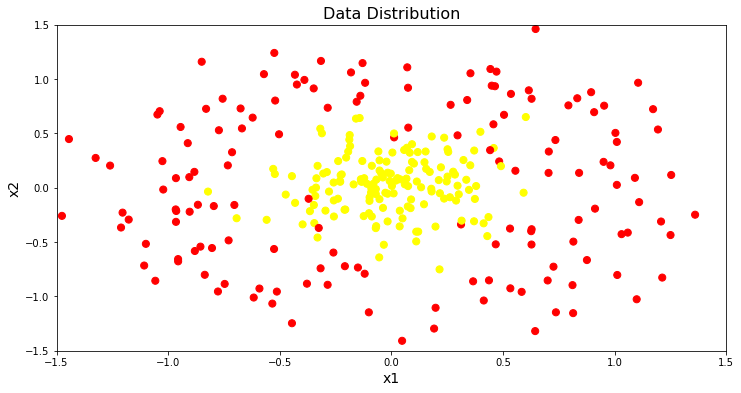

In [5]:
plt.figure(figsize=(12, 6))

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

plt.title("Data Distribution", fontsize=16)
plt.xlabel("x1", fontsize=14)
plt.ylabel("x2", fontsize=14)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.show()

We can clearly see that there is no linear decision boundary which can reasonably be drawn. This will be shown more explicitly below.<br>
Now split the data into test and train sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Create separate scatter plots for the train and test sets to ensure they are comparable.

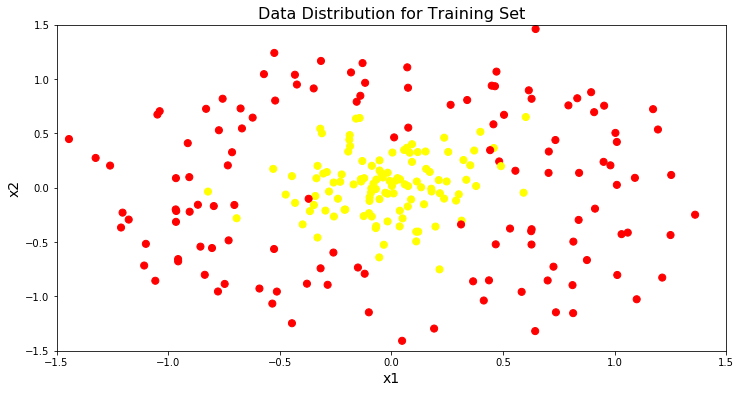

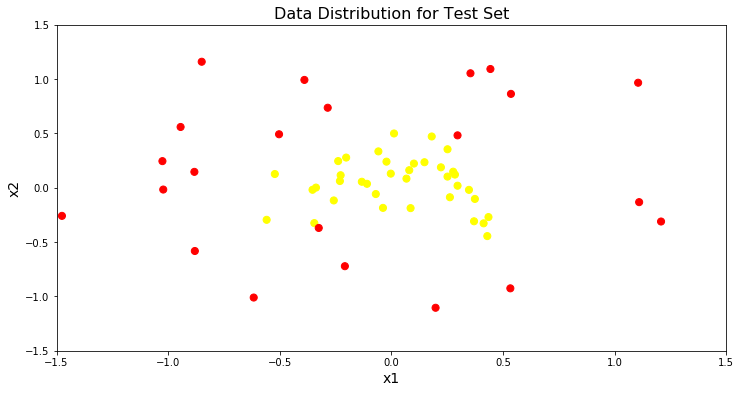

In [7]:
# Plot the data in the train set
plt.figure(figsize=(12, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
plt.title("Data Distribution for Training Set", fontsize=16)
plt.xlabel("x1", fontsize=14)
plt.ylabel("x2", fontsize=14)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.show()

# Plot the data in the test set
plt.figure(figsize=(12, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap='autumn')
plt.title("Data Distribution for Test Set", fontsize=16)
plt.xlabel("x1", fontsize=14)
plt.ylabel("x2", fontsize=14)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.show()

Below is a box which can scale the data, if we wish.

In [8]:
# First scale the feature matrix
# scaler = StandardScaler().fit(X_train)
# X_train = scaler.transform(X_train)
# scaler = StandardScaler().fit(X_test)
# X_test = scaler.transform(X_test)

We have found that scaling the feature vectors sometimes increases our classification accuracy, but often lowers it. We have thus disabled it for this experiment.

We now apply fit our Logistic Regression function to the training data

In [9]:
log_reg_ovr_liblinear = LogisticRegression(solver='liblinear',C=1)

log_reg_ovr_liblinear.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

We now plot the results, showing the linear decision boundary by sending in poly_order=0

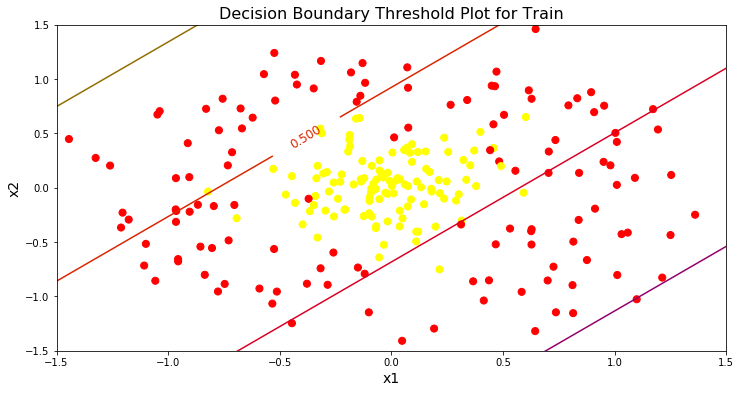

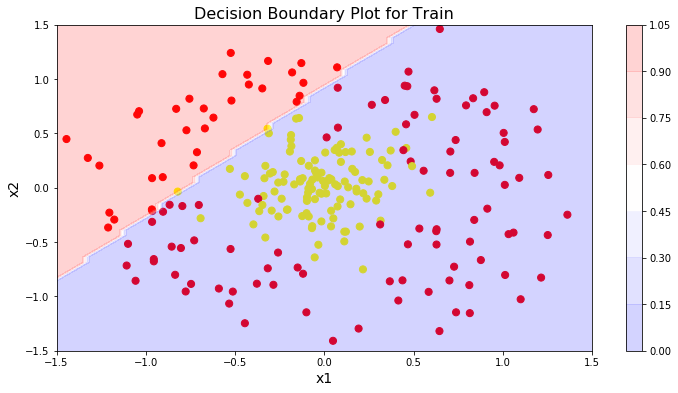

In [10]:
poly_order=0

# Create plot with decision boundary position over different thresholds
# Useful for understanding the decision boundaries at various thresholds. It reveals the scope of the
# solution space. We use the function "decision_boundary_various_thresholds" to plot this decision boundary
plt.figure(figsize=(12, 6))
plt.title("Decision Boundary Threshold Plot for Train", fontsize=16)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
plt.xlabel("x1", fontsize=14)
plt.ylabel("x2", fontsize=14)
decision_boundary_various_thresholds(log_reg_ovr_liblinear, X_train, poly_order)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.show()

# Generate plot for default predictions
plt.figure(figsize=(12, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
plt.title("Decision Boundary Plot for Train", fontsize=16)
plt.xlabel("x1", fontsize=14)
plt.ylabel("x2", fontsize=14)
decision_boundary_class_colored(log_reg_ovr_liblinear, X_train, poly_order, False)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.show()

We now use this model (fit to unexpanded features) and assess the accuracy on the test data.

In [11]:
print("No. of Iterations:", log_reg_ovr_liblinear.n_iter_ )

y_test_predicted = log_reg_ovr_liblinear.predict(X_test)

accuracy_score_test = np.mean(y_test_predicted == y_test)
print("\nAccuracy: ", accuracy_score_test)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))

No. of Iterations: [3]

Accuracy:  0.23333333333333334

Test Confusion Matrix:
[[14  9]
 [37  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.61      0.38        23
           1       0.00      0.00      0.00        37

   micro avg       0.23      0.23      0.23        60
   macro avg       0.14      0.30      0.19        60
weighted avg       0.11      0.23      0.15        60



We can clearly see that a linear model does not work well for this data. We will now explore using polynomial feature expansion.

We now further split our training data into even smaller groups.<br>
We have named these train_prime and test_prime to distinguish them from the full train and test

In [12]:
X_train_prime, X_test_prime, Y_train_prime, Y_test_prime = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

Here we loop through different polynomial feature expansions and keep track fo the score for each so we can choose an optimal model complexity.

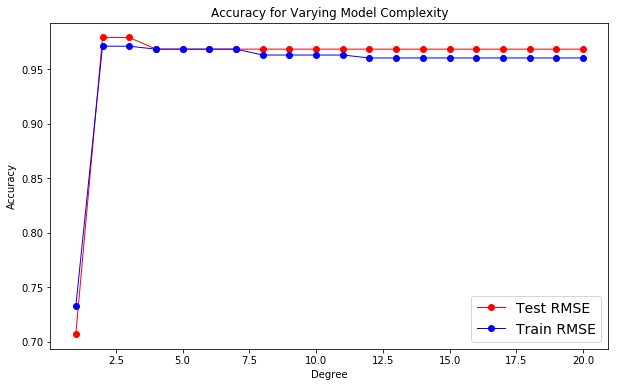

In [13]:
degreeList = list(range(1, 21))

error_train_prime, error_test_prime = [], []

for degree in degreeList:
    
    # Fit to current degree
    poly = PolynomialFeatures(degree)
    curr_features_train = poly.fit_transform(X_train_prime)
    curr_features_test = poly.fit_transform(X_test_prime)
    # Fit class
    log_reg_ovr_liblinear = LogisticRegression(solver='liblinear',C=1)
    log_reg_ovr_liblinear.fit(curr_features_train,Y_train_prime)
    # Make predictions
    Y_train_prime_pred = log_reg_ovr_liblinear.predict(curr_features_train)
    Y_test_prime_pred = log_reg_ovr_liblinear.predict(curr_features_test)
    
    # These keep track of MSE for testing and training datasets for each polynomial order considered
    error_train_prime.append(log_reg_ovr_liblinear.score(curr_features_train, Y_train_prime))
    error_test_prime.append(log_reg_ovr_liblinear.score(curr_features_test, Y_test_prime))
    
# Below plots the “rmse vs. degree”
plt.figure(figsize=(10, 6))   
plt.plot(degreeList, np.sqrt(error_test_prime), "ro-", alpha=1.0, linewidth=1.0, label="Test RMSE")
plt.plot(degreeList, np.sqrt(error_train_prime), "bo-", alpha=1.0, linewidth=1.0, label="Train RMSE")    
plt.legend(loc="best", fontsize=14) 
plt.xlabel("Degree")
plt.ylabel("Accuracy")
plt.title("Accuracy for Varying Model Complexity")
# plt.ylim(bottom = -2, top=5) # Adjust the y range to better understand which order of polynomial really becomes a problem
plt.show()

From the above results we have chosen to use 2nd order features.<br>
Running multiple times shows different orders being optimal, but 2 is often one of the best, and as it also has the lowest complexity of its competitors we will use that.

In [14]:
poly_order=2

We now apply Logistic Regression to features expanded to 2nd order and examine the new decision boundary.

First we expand our feature space

In [15]:
poly = PolynomialFeatures(poly_order)
features_train = poly.fit_transform(X_train)

Now fit our Logistic Regression class to this new feature space

In [16]:
log_reg_ovr_liblinear = LogisticRegression(solver='liblinear',C=1)

log_reg_ovr_liblinear.fit(features_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

We now visualize the decision boundary for this expanded feature space

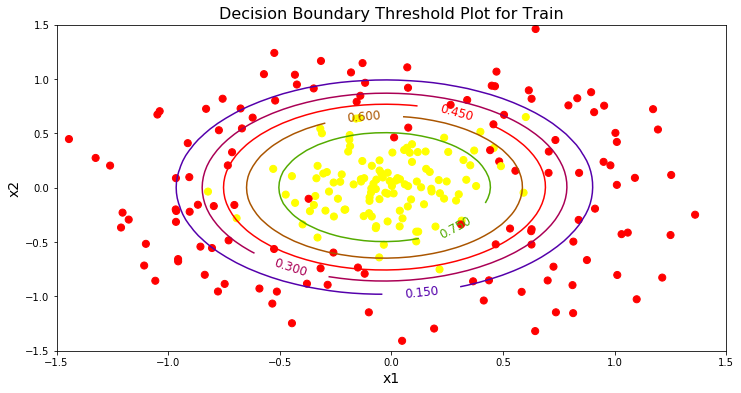

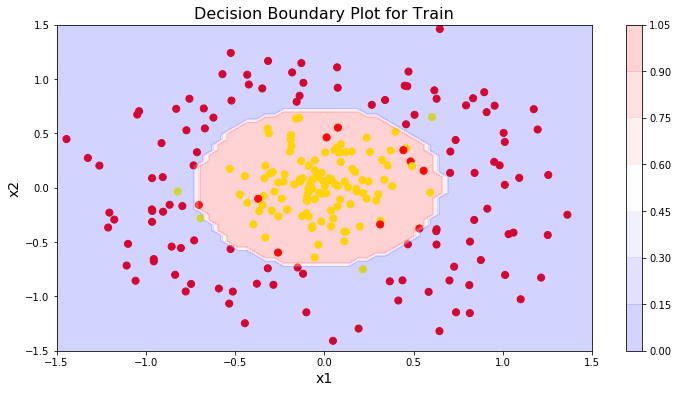

In [17]:
# Create plot with decision boundary position over different thresholds
# Useful for understanding the decision boundaries at various thresholds. It reveals the scope of the
# solution space. We use the function "decision_boundary_various_thresholds" to plot this decision boundary
plt.figure(figsize=(12, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
plt.title("Decision Boundary Threshold Plot for Train", fontsize=16)
plt.xlabel("x1", fontsize=14)
plt.ylabel("x2", fontsize=14)
decision_boundary_various_thresholds(log_reg_ovr_liblinear, X_train, poly_order)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.show()

# Generate plot for default predictions
plt.figure(figsize=(12, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
plt.title("Decision Boundary Plot for Train", fontsize=16)
plt.xlabel("x1", fontsize=14)
plt.ylabel("x2", fontsize=14)
decision_boundary_class_colored(log_reg_ovr_liblinear, X_train, poly_order, False)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.show()

We now use the above-fit function to make a prediction on the full train set.

In [18]:
# Now predict for full train set set
print("No. of Iterations for Train Set:", log_reg_ovr_liblinear.n_iter_ )

y_train_predicted = log_reg_ovr_liblinear.predict(features_train)

accuracy_score_test = np.mean(y_train_predicted == y_train)
print("\nAccuracy: ", accuracy_score_test)

print("\nTrain Confusion Matrix:")
print(confusion_matrix(y_train, y_train_predicted))

print("\nClassification Report:")
print(classification_report(y_train, y_train_predicted))

No. of Iterations for Train Set: [5]

Accuracy:  0.9458333333333333

Train Confusion Matrix:
[[118   9]
 [  4 109]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       127
           1       0.92      0.96      0.94       113

   micro avg       0.95      0.95      0.95       240
   macro avg       0.95      0.95      0.95       240
weighted avg       0.95      0.95      0.95       240



We can see that 2nd order polynomial for the features seems to work pretty well.

In [19]:
poly_order=2

We again apply 2nd order expansion to our features, but this time we look at the created decision boundary for the test set.

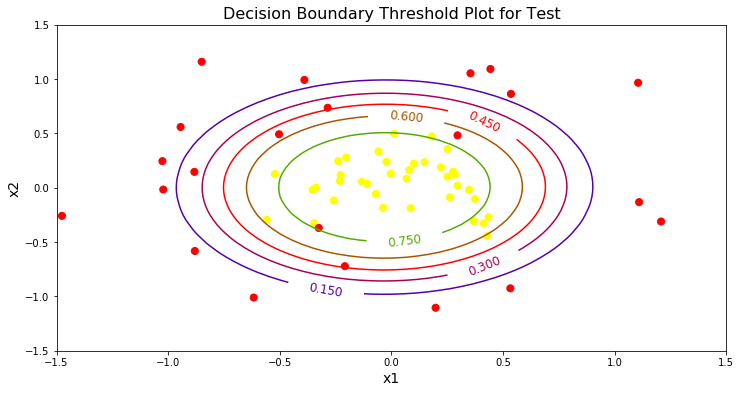

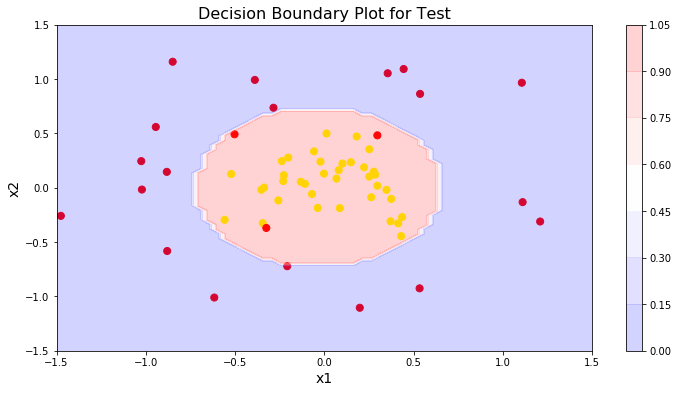

In [20]:
# Use logistic regression
poly = PolynomialFeatures(poly_order)
features_train = poly.fit_transform(X_train)
features_test = poly.fit_transform(X_test)

log_reg_ovr_liblinear = LogisticRegression(solver='liblinear',C=1)
log_reg_ovr_liblinear.fit(features_train,y_train)

# Create plot with decision boundary position over different thresholds
# Useful for understanding the decision boundaries at various thresholds. It reveals the scope of the
# solution space. We use the function "decision_boundary_various_thresholds" to plot this decision boundary
plt.figure(figsize=(12, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap='autumn')
plt.title("Decision Boundary Threshold Plot for Test", fontsize=16)
plt.xlabel("x1", fontsize=14)
plt.ylabel("x2", fontsize=14)
decision_boundary_various_thresholds(log_reg_ovr_liblinear, X_test, poly_order)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.show()

# Generate plot for default predictions
plt.figure(figsize=(12, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap='autumn')
plt.title("Decision Boundary Plot for Test", fontsize=16)
plt.xlabel("x1", fontsize=14)
plt.ylabel("x2", fontsize=14)
decision_boundary_class_colored(log_reg_ovr_liblinear, X_test, poly_order, False)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.show()

We now examine the error metrics for the test set.

In [21]:
print("No. of Iterations for Test set:", log_reg_ovr_liblinear.n_iter_ )

y_test_predicted = log_reg_ovr_liblinear.predict(features_test)
#print(y_test_predict)

accuracy_score_test = np.mean(y_test_predicted == y_test)
print("\nAccuracy: ", accuracy_score_test)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))

No. of Iterations for Test set: [5]

Accuracy:  0.95

Test Confusion Matrix:
[[20  3]
 [ 0 37]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        23
           1       0.93      1.00      0.96        37

   micro avg       0.95      0.95      0.95        60
   macro avg       0.96      0.93      0.95        60
weighted avg       0.95      0.95      0.95        60



We have found that by using augmented feature matrices we are able to separate data which would have otherwise not been able to be separated by using Logistic Regression. By computing the accuracy, creating the confusion matrix, and misualizing the decision boundary we have confirmed that the classification on the train and test datasets is quite good.<br>

Also, we have explored implementing feature scaling. We have found that it sometimes is able to improve the accuracy, but in most cases it has lowered our predictive accuracy. We have thus not implemented this for this experiment.<br>

The most important take home from this is as follows:<br>
In spite of our 2d feature set being augmented to a non linear feature-space, the separatrix itself does not distort the space. That is to say, the model that classifies our target  is still a linear map of a multidimensional feature space. This is contrary to the idea of a curved manifold, where the space would itself be distorted to carve out the decission boundary.<br>
That is not the case with  Logistic Regression. It always finds a linear decision boundary, regardless of the complexity of the feature space. We simply add additional weights for each dimension, but the mapping is always linear.